# Import libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

# Load dataset 

In [9]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df.shape

(768, 9)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
# seperate out features and target value from datsaset

X=df.drop(["Outcome"],axis=1).values
y=df["Outcome"].values

In [20]:
X.shape

(768, 8)

In [21]:
y.shape

(768,)

In [22]:
#split the data in training and testing set

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [23]:
print("X_train shape : ",X_train.shape)
print("X_test shape : ",X_test.shape)
print("y_train shape : ",y_train.shape)
print("y_test shape : ",y_test.shape)

X_train shape :  (537, 8)
X_test shape :  (231, 8)
y_train shape :  (537,)
y_test shape :  (231,)


In [24]:
#consider diff values of k
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
# single value of k

#set up a model
knn=KNeighborsClassifier(n_neighbors=3)

#fit the model
knn.fit(X_train,y_train)

#compute accuracy on training set
acc_k3_train=knn.score(X_train,y_train)
print("Training data accuracy: ",acc_k3_train)

#compute accuracy on testing set
acc_k3_test=knn.score(X_test,y_test)
print("Testing data accuracy: ",acc_k3_test)

Training data accuracy:  0.8435754189944135
Testing data accuracy:  0.6753246753246753


D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [29]:
# Multiple value of K

neighbors=np.arange(1,10)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

In [33]:
for i,k in enumerate(neighbors):
    #set up a model
    knn=KNeighborsClassifier(n_neighbors=k)
    
    #fit the model
    knn.fit(X_train,y_train)

    #compute accuracy on training set
    train_accuracy[i]=knn.score(X_train,y_train)
    
    #compute accuracy on testing set
    test_accuracy[i]=knn.score(X_test,y_test)

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [34]:
train_accuracy

array([1.        , 0.84171322, 0.84357542, 0.81191806, 0.80260708,
       0.79515829, 0.80074488, 0.78957169, 0.78957169])

In [35]:
test_accuracy

array([0.68831169, 0.72727273, 0.67532468, 0.72294372, 0.68831169,
       0.7012987 , 0.69264069, 0.71428571, 0.7012987 ])

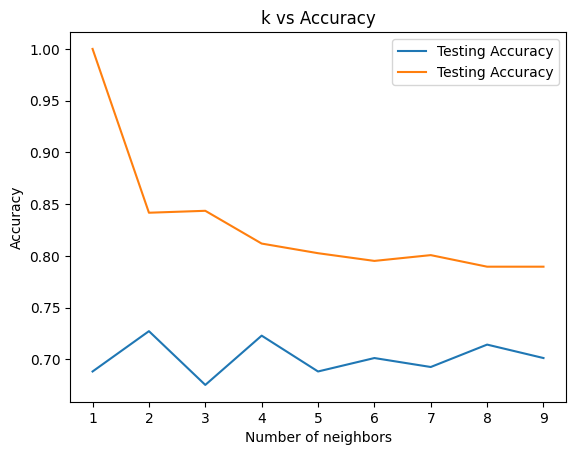

In [39]:
#plot train and test accuracy

plt.plot(neighbors,test_accuracy,label="Testing Accuracy")
plt.plot(neighbors,train_accuracy,label="Training Accuracy")
plt.legend()
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.title("k vs Accuracy")
plt.show()

In [40]:
# set up knn classifier with k =4
# single value of k

#set up a model
knn=KNeighborsClassifier(n_neighbors=4)

#fit the model
knn.fit(X_train,y_train)

#compute accuracy on testing set
score=knn.score(X_test,y_test)
print("accuracy: ",score)

accuracy:  0.7229437229437229


D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
